# 17 Multivariate Statistics


17.2 Expected Value and Mean

In probability, the average value of some random variable X is called the expected value or the expectation. The expected value uses the notation E with square brackets around the name of the variable. It is calculated as the probability weighted sum of values that can be drawn.for example 

                            [E] = sum of ( x1 * p1,x2 * p2,x3 * p3,....,xn * pn)  
                            
In simple cases, such as the flipping of a coin or rolling a dice, the probability of each event is just as likely. Therefore, the expected value can be calculated as the sum of all values multiplied by the reciprocal of the number of values.                        

                            [E] = (1/n) sum of (x1,x2,x3,....,xn)
                            
In statistics, the mean, or more technically the arithmetic mean or sample mean, can be estimated from a sample of examples drawn from the domain. It is confusing because mean, average, and expected value are used interchangeably. In the abstract, the mean is denoted by the lower case Greek letter mu and is calculated from the sample of observations, rather than all possible values.                            

                            mu = (1/n) sum of (x1,x2,x3,....,xn)  = p(x) sum of (x) 
                            
The arithmetic mean can be calculated for a vector or matrix in NumPy by using the mean() function.
The mean function can calculate the row or column means of a matrix by specifying the axis argument and the value 0 or 1 respectively.


17.3 Variance and Standard Deviation

In probability, the variance of some random variable X is a measure of how much values in the distribution vary on average with respect to the mean. The variance is denoted as the function Var() on the variable and calculated as the average squared difference of each value in the distribution from the expected value. Or the expected squared difference from the expected value.

                            Var[X] = E[(X  E[X])^2] 
                            
Assuming the expected value of the variable has been calculated (E[X]), the variance of the random variable can be calculated as the sum of the squared difference of each example from the expected value multiplied by the probability of that value.                            

                Var[X] = sum of{(p(X1) * (X1 - E[X])^2), (p(X2) * (X2 - E[X])^2),...., (p(Xn) * (Xn - E[X])^2)} 
                
If the probability of each example in the distribution is equal, variance calculation can drop the individual probabilities and multiply the sum of squared dierences by the reciprocal of the number of examples in the distribution.                

                Var[X] = (1/n) sum of{((X1 - E[X])^2),((X2 - E[X])^2),....,((Xn - E[X])^2)} 

In statistics, the variance can be estimated from a sample of examples drawn from the domain. The sum of the squared differences is multiplied by the reciprocal of the number of examples minus 1 to correct for a bias (bias is related to a deeper discussion on degrees of freedom and I refer you to references at the end of the lesson).

                                     n   
                Var[X] = (1/(n-1)) sumof (Xi - mean(X))^2
                                    i= 1
                                    
In NumPy, the variance can be calculated for a vector or a matrix using the var() function. By default, the var() function calculates the population variance. To calculate the sample variance, you must set the ddof argument to the value 1.                                      
 The standard deviation is calculated as the square root of the variance and is denoted as  lowercase s.

                s = sqrt(Var[X})
                
NumPy also provides a function for calculating the standard deviation directly via the std() function. As with the var() function, the ddof argument must be set to 1 to calculate the unbiased sample standard deviation and column and
row standard deviations can be calculated by setting the axis argument to 0 and 1 respectively.
                
                
17.4 Covariance and Correlation

The covariance matrix is a square and symmetric matrix that describes the covariance between two or more random variables. The diagonal of the covariance matrix are the variances of each of the random variables, as such it is often called the variance-covariance matrix. A covariance matrix is a generalization of the covariance of two variables and captures the way in which all variables in the dataset may change together. The covariance matrix is denoted as the uppercase Greek letter Sigma. 

                Sigma = E[(X - E[X]) * (Y - E[Y])]     =  cov(Xi, Yj)    i =  1,2,..n ; j = 1,2,...,m
                
X is a matrix where each column represents a random variable. The covariance matrix provides a useful tool for separating the structured relationships in a matrix of random variables. This can be used to decorrelate variables or applied as a transform to other variables. It is a key element used in the Principal Component Analysis data reduction method.

The covariance matrix can be calculated in NumPy using the cov() function. The cov() function can be called with a single 2D array where each sub-array contains a feature (e.g. column). If this function is called with your data defined in a normal matrix format (rows then columns), then a transpose of the matrix will need to be provided to the function in order to correctly calculate the covariance of the columns.



                

In [13]:
from numpy import array
from numpy import mean
from numpy import var
from numpy import std
from numpy import cov

v = array([1,2,3,4,5,6])
#print(mean(v)) # calculate mean function for vector
#print(var(v, ddof = 1)) # calculate variance function for vector
#print(std(v, ddof = 1)) # calculate variance function for vector

M = array([
[1,2,3,4,5,6],
[11,32,53,42,59,65]])
#print(mean(M, axis=0)) # calculate mean function for column of matrix M
#print(mean(M, axis=1)) # calculate mean function for row of matrix M

#print(var(M, ddof=1, axis=0)) # calculate variance function for column of matrix M
#print(var(M, ddof=1, axis=1)) # calculate vvariance function for row of matrix M

#print(std(M, ddof=1, axis=0)) # calculate variance function for column of matrix M
#print(std(M, ddof=1, axis=1)) # calculate vvariance function for row of matrix M

X = array([
[1, 5, 8],
[3, 5, 11],
[2, 4, 9],
[3, 6, 10],
[1, 5, 10]])

Sigma = cov(X.T) # calculate covaraince matrix
print(Sigma)

[[1.   0.25 0.75]
 [0.25 0.5  0.25]
 [0.75 0.25 1.3 ]]


# 18. Principal Component Analysis

An important machine learning method for dimensionality reduction is called Principal Component Analysis which uses simple matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions.

18.2 What is Principal Component Analysis

Principal Component Analysis, or PCA is a method for reducing the dimensionality of data. It can be thought of as a projection method where data with m-columns (features) is projected into a subspace with m or fewer columns, while retaining the essence of the original data. 
PCA is an operation applied to a dataset, represented by an n x m matrix A that results in a projection of A which we will call B. Let's walk through the steps of this operation.

                            a(1;1) a(1;2)
                        A = a(2;1) a(2;2)  
                            a(3;1) a(3;2) 
                            
                        B = PCA(A)    
            
step 1 : calculate the mean values of each column.

                        M = mean(A)  ## for each column
                        
step 2 : center the values in each column by subtracting the mean column value.

                        C = A - M
                        
Step 3 : to calculate the covariance matrix of the centered matrix C. 

                            V = cov(C)                    

         Correlation is a normalized measure of the amount and direction (positive or negative) that two columns change together. A covariance matrix is a calculation of covariance of a given matrix with covariance scores for every column with every other column, including itself. 

Step 4 : to the eigendecomposition of the covariance matrix V. This results in a list of eigenvalues and a list of eigenvectors. 
        
                        eigen_values, eigen_vectors = eig(V) 
                        
The eigenvectors represent the directions or components for the reduced subspace of B, whereas the eigenvalues represent the magnitudes for the directions. 

A total of m or less components must be selected to comprise the chosen subspace. Ideally, we would select k eigenvectors, called principal components, that have the k largest eigenvalues.

                       B = select(values, vecotrs)
                       
                       
Other matrix decomposition methods can be used such as Singular-Value Decomposition, or SVD. As such, generally the values are referred to as singular values and the vectors of the subspace are referred to as principal components. Once chosen, data can be projected into the subspace via matrix multiplication. 

                      p = B^T . A
                      
Where A is the original data that we wish to project, B^T s the transpose of the chosen
principal components and P is the projection of A. This is called the covariance method for
calculating the PCA                      


18.4 Principal Component Analysis in scikit-learn

We can calculate a Principal Component Analysis on a dataset using the PCA() class in the scikit-learn library. The benefit of this approach is that once the projection is calculated, it can be applied to new data again and again quite easily. 
When creating the class, the number of
components can be specified as a parameter. The class is first fit on a dataset by calling the fit() function, and then the original dataset or other data can be projected into a subspace with the chosen number of dimensions by calling the transform() function. Once fit, the singular values and principal components can be accessed on the PCA class via the explained variance and components attributes. 


In [25]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from sklearn.decomposition import PCA

A = array([
[1, 2],
[3, 4],
[5, 6]])

M = mean(A.T, axis = 1) # calculate column wise mean
#print(M)
C = A - M # calculate center column by subtracting column means
#print(C)
V = cov(C.T) # calculate covariance matrix of centered matrix
#print(V)
values, vectors = eig(V) # Factorize covarince matrix
#print(values)
#print(vectors)

P = vectors.T.dot(C.T) # project data

#print(P.T) # from result it suggesting that we could project our 3 X 2 matrix onto a 3 x 1 
           # matrix with little loss.
      
        
###########principal component analysis with scikit-learn####################

A = array([
[1, 2],
[3, 4],
[5, 6]])

pca = PCA(2) # create the transform 
pca.fit(A) # fit transform

#access values and vectors
print(pca.components_) 
print(pca.explained_variance_)

B  = pca.transform(A) # transform data
print(B)

## with with some very minor floating point rounding that we achieve the same principal 
##components, singular values, and projection as in the previous example.                            

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
[8.00000000e+00 2.25080839e-33]
[[-2.82842712e+00  2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00 -2.22044605e-16]]


# 19. Linear Regression

19.4 Linear Regression Dataset

19.5 Solve via Inverse

To solve the regression problem using the matrix inverse. For given input x, the coefficients can be calculated by below equation which then multiply by x will provide y.

            b = (X^T  X)^-1  X^T  y 
            
This can be achive in NumPy using the inv() function for calculating the matrix inverse.
    i.e      b = inv(X.T.dot(X)).dot(X.T).dot(y)
    
Once the coefficients are calculated, we can use them to predict outcomes given X. i.e 
            yhat = X.dot(b)
           
A problem with this approach is the matrix inverse that is both computationally expensive
and numerically unstable. An alternative approach is to use a matrix decomposition to avoid
this operation. 


19.7 Solve via SVD and Pseudoinverse

Singular-Value Decomposition, or SVD for short, is a matrix decomposition method like QR decomposition.

            X = U  E  V^T
            
Where X is the real n x m matrix that we wish to decompose, U is a m x m matrix, E is an m x n diagonal matrix, and V^T is the transpose of an n x n matrix. Unlike the QR decomposition, all matrices have a singular-value-decomposition
Once decomposed, the coefficients can be found by calculating the pseudoinverse of the input matrix X and multiplying that by the output vector y.

            b = X^+  y 
            
Where the pseudoinverse X^+ is calculated as  X^+ = U  D^+  V^T
NumPy provides the function pinv() to calculate the pseudoinverse directly.



19.8 Solve via Convenience Function

NumPy provides a convenience function named lstsq() that solves the linear least squares function using the SVD approach. The function takes as input the X matrix and y vector and returns the b coefficients as well as residual errors, the rank of the provided X matrix and the singular values. 
            


[1.00233226]


C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


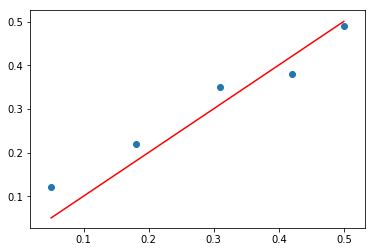

In [52]:
from numpy import array
from numpy.linalg import inv
from numpy.linalg import pinv
from numpy.linalg import lstsq
from matplotlib import pyplot

data = array([
[0.05, 0.12],
[0.18, 0.22],
[0.31, 0.35],
[0.42, 0.38],
[0.5, 0.49]])

x, y = data[:,0], data[:,1] # split data into input and output
#print(y)
X = x.reshape((len(x),1))
#print(x)

#pyplot.scatter(X,y) # scatter plot of the dataset is created 
#pyplot.show() # shows straight line cannot fit this dataset.


############## The Regression problem solve by matrix inversion. #####################

#b  = inv(X.T.dot(X)).dot(X.T).dot(y) # calculate the coefficient using x and y
#print(b)

#yhat = X.dot(b) # make prediction using x and coefficient

#pyplot.scatter(X, y) # scatter plot of dataset
#pyplot.plot(X, yhat, color="red") # line plot for model
#pyplot.show()


############## The Regression problem solve via SVD and Pseudoinverse. ####################

#b = pinv(X).dot(y) # calculate the coefficient using x and y
#print(b)

#yhat = X.dot(b)  # make prediction using x and coefficient

# pyplot.scatter(X, y) # scatter plot of dataset
# pyplot.plot(X, yhat, color="red") # line plot for model
# pyplot.show()


############## The Regression problem solve via Convenience Function. ####################

b, residuals, rank, s = lstsq(X, y)  # calculate the coefficient using x and y
print(b)

yhat = X.dot(b)  # make prediction using x and coefficient

pyplot.scatter(X, y) # scatter plot of dataset
pyplot.plot(X, yhat, color="red") # line plot for model
pyplot.show()


